# Trabalho 1
Alunos: João Pedro Banhato Pereira e Pedro de Araujo Bhering Bittencourt

**"A Parallel 2D Numerical Simulation of Tumor Cells Necrosis by Local Hyperthermia (sem Hipertermia)"**

https://iopscience.iop.org/article/10.1088/1742-6596/490/1/012138/pdf



# Relatório

#### Modelo inicial

-  Modelo de Biotransferência de Calor (Equação de Pennes)

\begin{equation}
\begin{cases}
\rho c \frac{\partial T_1(\vec{x}, t)}{\partial t} = \nabla \cdot k \nabla T_1(\vec{x}, t) + \omega_{b} \rho_b c_b (T_a - T_1(\vec{x}, t)) + Q_m(\vec{x}) + Q_r(\vec{x}, t),&\text{em } \Omega, t > 0 \\
\alpha T_1(\vec{x}, t) + \beta \nabla T_1(\vec{x}, t) \cdot \vec{n} = f(\vec{x}, t),& \text{em } \Gamma, t > 0 \\
T_1(\vec{x}, 0) = T_2(\vec{x}),& \text{em } \Omega
\end{cases}
\end{equation}

onde:

 $\rho$ é a densidade do tecido, $c$ o calor específico do tecido e $k$ a condutividade térmica do tecido;

 $c_b$ é o calor específico do sangue, $\rho_b$ a densidade do sangue, $\omega_b$ a taxa de perfusão do sangue e $T_a$ a temperatura arterial do sangue;

 $Q_m$ é a geração de calor metabólico, $T_1$ a temperatura do tecido, $Q_r$ o aquecimento externo (hipertermia) e $T_2$ a temperatura inicial.


#### Considerações para o trabalho da disciplina

- Consideramos a função $T_1$ como sendo independente em relação ao tempo;

- $\dfrac{\partial T_1}{\partial t} = 0$;

- Vamos considerar $T_1$ como $T$:

\begin{equation}
% \begin{cases}
\rho c \cdot 0 = \nabla \cdot k \nabla {T}(\vec{x}) - \omega_{b} \rho_b c_b ({T(\vec{x}) - T_a}) + Q_m(\vec{x}) + Q_r(\vec{x})
% \end{cases}
\end{equation}

\begin{equation}
% \begin{cases}
\nabla \cdot k \nabla T(\vec{x}) =  \omega_{b} \rho_b c_b (T(\vec{x}) - T_a) - Q_m(\vec{x}) - Q_r(\vec{x})
% \end{cases}
\end{equation}

sendo:

 $\nabla \cdot k \nabla {T}(\vec{x})$: difusão do calor;

 $\omega_b \rho_b c_b (T(\vec{x}) - T_a)$: comportamento do sangue;

 $Q_m(\vec{x})$: geração metabólica do calor;

 $Q_r(\vec{x})$: calor externo.

#### Modelos atingidos

- Chegamos aos seguintes modelos para cada trabalho:

Modelo sem hipertermia:

\begin{equation}
    \nabla \cdot k \nabla T(\vec{x}) =  \omega_{b} \rho_b c_b (T(\vec{x})-T_a) - Q_m(\vec{x})
\end{equation}

Modelo com hipertermia:

\begin{equation}
    \nabla \cdot k \nabla T(\vec{x}) =  \omega_{b} \rho_b c_b (T(\vec{x}) - T_a) - Q_m(\vec{x}) - Q_r(\vec{x})
\end{equation}

#### Meio heterogêneo

- Como os valores de $k$ e $\omega_{b}$ variam de acordo com o meio (dentro ou fora do tumor), temos um meio heterogêneo, o que requer uma discretização da difusão do calor($\nabla \cdot k \nabla T(\vec{x})$) com pontos fictícios entre os pontos do domínio.


\begin{equation}
\nabla \cdot k \nabla T = \nabla \left[k(x,y) \nabla T(x,y)\right]       
\end{equation}


\begin{equation}
\begin{aligned}
\nabla \cdot k \nabla T \approx
\frac{1}{h_x^2} \left[k_{i-1/2,j} T_{{i-1, j}} - (k_{i-1/2,j} + k_{i+1/2,j}) T_{{i,j}} + k_{i+1/2,j} T_{{i+1,j}} \right] \\
+ \frac{1}{h_y^2} \left[k_{i,j - 1/2} T_{{i, j-1}} - (k_{i,j-1/2} + k_{i,j+1/2}) T_{{i,j}} + k_{i,j+1/2} T_{{i,j+1}} \right]
\end{aligned}
\end{equation}



com $k_{i+1/2,j} = \dfrac{2 k_{i,j}k_{i+1,j}}{k_{i,j} + k_{i+1,j}}$ e $k_{i,j+1/2} = \dfrac{2 k_{i,j}k_{i,j+1}}{k_{i,j} + k_{i,j+1}}$

Agora, vamos considerar $h_x = h_y = h$, e a partir disso isolar $T_{{i, j}}$:

\begin{equation}
\begin{aligned}
\dfrac{1}{h^2} [k_{i-1/2,j} T_{{i-1,j}} + k_{i,j-1/2} T_{{i,j-1}} -\left( k_{i-1/2,j} + k_{i+1/2,j} + k_{i,j-1/2} + k_{i,j+1/2} \right)T_{{i,j}} +\\+ k_{i+1/2,j} T_{{i+1,j}} + k_{i,j+1/2} T_{{i,j+1}}]
=\omega_{b_{i,j}} \rho_b c_b(T_{{i,j}} - T_a) - Q_{m_{i,j}} - Q_{r_{i,j}}
\end{aligned}
\end{equation}

Para facilitar a análise, vamos chamar cada termo que multiplica cada $T_{{i,j}}$ de $q_{i,j}$:

$q_{i,j} = \left( k_{i-1/2,j} + k_{i+1/2,j} + k_{i,j-1/2} + k_{i,j+1/2} \right)$

$q_{i-1,j} = k_{i-1/2,j}$

$q_{i,j-1} = k_{i,j-1/2}$

$q_{i+1,j} = k_{i+1/2,j}$

$q_{i,j+1} = k_{i,j+1/2}$

\begin{equation}
\begin{aligned}
- \dfrac{q_{i,j}}{h^2} T_{i,j} = \dfrac{-q_{i-1,j}T_{{i-1,j}} - q_{i,j-1}T_{{i,j-1}} - q_{i+1,j}T_{{i+1,j}} - q_{i,j+1}T_{{i,j+1}}}{h^2} + \omega_{b{i,j}}\rho_b c_b(T_{{i,j}} - T_a) - Q_{m_{i,j}} - Q_{r_{i,j}}
\end{aligned}
\end{equation}


\begin{equation}
\begin{aligned}
T_{i,j} = \dfrac{q_{i-1,j} {T}_{i-1,j} + q_{i,j-1} T_{i,j-1} + q_{i+1,j} T_{i+1,j} + q_{i,j+1} T_{i,j+1} + h^2 \omega_{b_{i,j}} \rho_b c_b T_a + h^2Q_{m_{i,j}} + h^2Q_{r_{i,j}}}{q_{i,j} + h^2 \omega_{b_{i,j}} \rho_b c_b}
\end{aligned}
\end{equation}

- Para o trabalho sem hipertermia, a equação completa não possui o termo $Q_{r_{i,j}}$.

#### Parâmetros:


$\rho_b = 1 \times10^3 \, \text{Kg/m}^3$

$c_b = 4.2\times10^3 \, \text{J/Kg}^\circ \text{C}$

$T_a = 37^\circ \text{C}$

$
\omega_b =
\begin{cases}
5\times10^{-4} \, \text{s}^{-1}, & \text{(Normal)} \\
1.25\times10^{-3} \, \text{s}^{-1}, & \text{(Tumor)}
\end{cases}
$

$
Q_m =
\begin{cases}
400 \, \text{W/m}^3, & \text{(Normal)} \\
1000 \, \text{W/m}^3, & \text{(Tumor)}
\end{cases}
$

#### Domínio

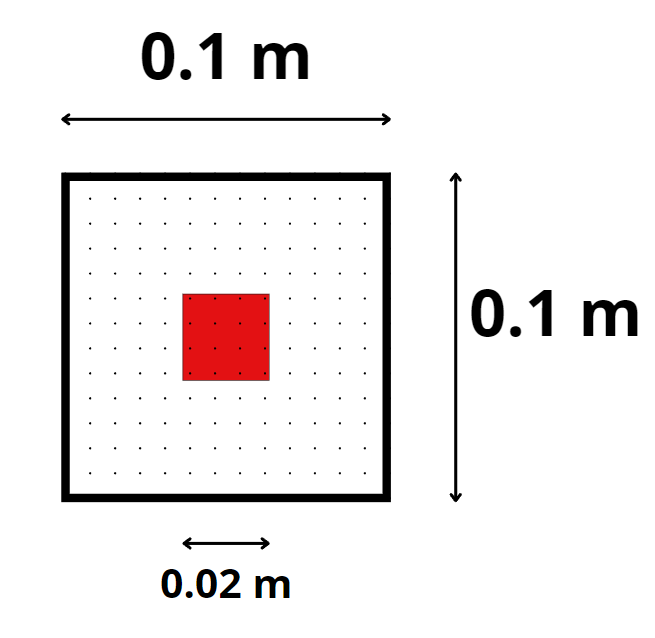

Consideramos uma condição de contorno de Dirichlet na parede esquerda da célula e Neumann com fluxo nulo para as outras paredes. Além disso, fizemos implementações em duas linguagens: Python e C++.

Primeiramente, fizemos os códigos na linguagem Python por estarmos mais habituados e pelos códigos da disciplina serem apresentados nessa linguagem. No entanto, essa linguagem apresentou um grande problema que é o tempo de execução dos códigos quando a discretização era realtivamente pequena, na ordem de $10^{-3}$. Assim, foi conversados com outros colegas da disciplina e também fizemos um código na linguagem C++ para tentar contornar esse problema.

Com isso, logo a seguir, são apresentados os 4 códigos desenvolvidos para os problemas apresentados.

##Parte sem hipertermia

- Resolver a Eq. (1) sem o termo Qr e sem a derivada em relação ao tempo
- Incluir uma motivação e contextualização do tema
- Incluir conclusões sobre o estudo realizado"

In [ ]:
# Importando bibliotecas necessárias

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math
import time
plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
# Definindo o domínio e o quao discretizado será

h = 5e-3
x_size = 0.1
y_size = 0.1
x = np.arange(0, x_size+h/2, h)
y = np.arange(0, y_size+h/2, h)

# Funcoes uteis

def harmonica_j(i, x, j, y): # k_{j+(1/2)} - eixo x
  if j+1 >= len(x):  # Tratamento na borda direita
    return k(x[j], y[i])  # Considera apenas o valor local
  return ( 2 * k(x[j], y[i]) * k(x[j+1], y[i]) ) / ( k(x[j], y[i]) + k(x[j+1], y[i]) )

def harmonica_i(i, x, j, y): # k_{i+(1/2)} - eixo y
  if i+1 >= len(y):  # Tratamento na borda superior
    return k(x[j], y[i])  # Considera apenas o valor local
  return ( 2 * k(x[j], y[i]) * k(x[j], y[i+1]) ) / ( k(x[j], y[i]) + k(x[j], y[i+1]) )

def tumor(x, y): # define se o ponto pertence ao tumor
  if 0.04 <= x <= 0.06 and 0.04 <= y <= 0.06:
    return True
  else:
    return False

# Parametros

p_b = 1*10**3
c_b = 4.2*10**3
Ta = 37

tam = len(x) # dimensão do sistema
k_it = 0
k_max = 100000
error = 1
error_max = 1e-8 # erro maximo para convergencia

# Condicoes de Contorno

T_a = Ta #dirichlet esquerdo

def k(x, y):
  if tumor(x, y):
    return 0.55
  else:
    return 0.5

def w_b(x, y):
  if tumor(x, y):
    return 1.25*10**-3
  else:
    return 5*10**-4

def Q_m(x, y):
  if tumor(x, y):
    return 4200
  else:
    return 420

# valores de T
T=np.ones((tam,tam)) * Ta
T_new=np.zeros((tam,tam))

time_start = time.time()

while (k_it<k_max and error > error_max):
  for i in range(tam): # eixo y (cresce para cima)
    for j in range(tam): # eixo x (cresce para direita)
      # Condicoes de Contorno
      if (i == 0):  # Condição Neumann em d (lado de baixo)
          T_new[i, j] = T[1,j]
      elif (i == tam - 1):  # Condição Newumann em b (lado de cima)
          T_new[i, j] = T[tam-2,j]
      elif (j == 0):  # Condição Dirichlet em a (lado esquerdo)
          T_new[i, j] = T_a
      elif (j == tam - 1):  # Condição Robin em c (lado direito)
          T_new[i, j] = T[i,tam-2]

      else: # Pontos internos da matriz
        Tija = T[i,j-1]
        Tijb = T[i+1,j]
        Tijc = T[i,j+1]
        Tijd = T[i-1,j]

        qija = harmonica_i(i, x, j, y) # esquerda
        qijb = harmonica_j(i, x, j+1, y) # cima
        qijc = harmonica_i(i+1, x, j, y) # direita
        qijd = harmonica_j(i, x, j, y) # baixo
        qij = qija + qijb + qijc + qijd
        T_new[i,j] = ((qija*Tija + qijb*Tijb + qijc*Tijc + qijd*Tijd) + h**2*w_b(x[j], y[i])*p_b*c_b*Ta + h**2*Q_m(x[j], y[i])) / (qij + h**2*w_b(x[j], y[i])*p_b*c_b)

  error = np.linalg.norm(T_new-T, np.inf)/np.linalg.norm(T_new, np.inf)
  k_it=k_it+1
  T = np.copy(T_new)
time_end = time.time()

print(f"{k_it} iterações, erro: {error}")
if (time_end - time_start) > 60:
  print(f"Tempo: {(time_end - time_start) / 60.0} min")
else:
  print(f"Tempo: {time_end - time_start} s")

357 iterações, erro: 9.87381840410517e-09
Tempo: 3.3968374729156494 s


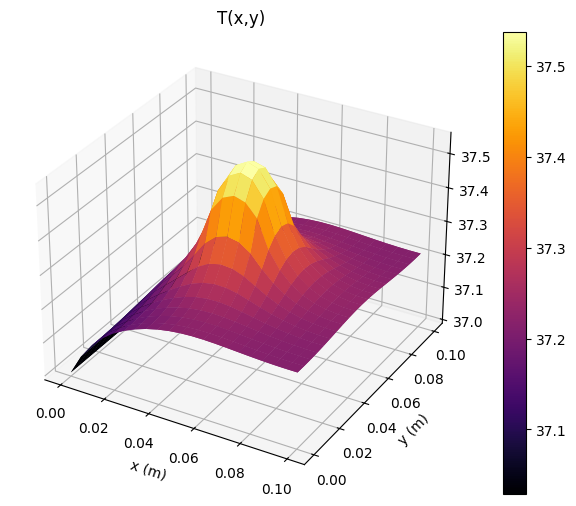

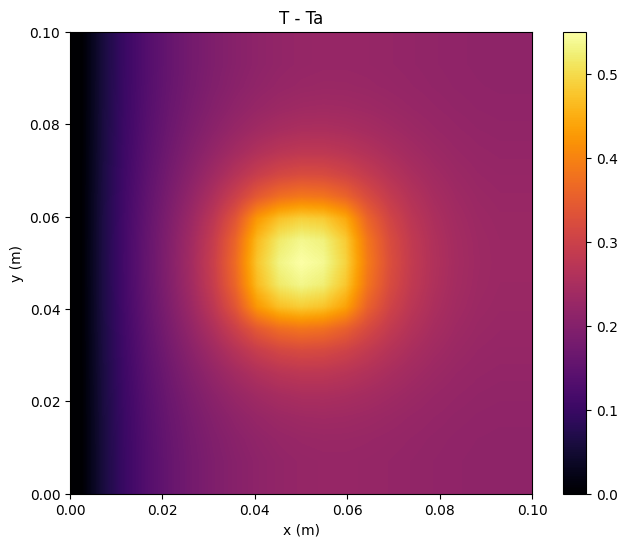

In [ ]:
# Gráfico 3D
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, T, cmap='inferno')
plt.colorbar(ax.plot_surface(X, Y, T, cmap='inferno'))

plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('T(x,y)')
plt.show()

# Gráfico com vista superior
plt.figure(figsize=(8, 6))
c = plt.imshow(T-Ta, cmap='inferno', interpolation='bilinear', extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.colorbar(c)

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('T - Ta')
plt.show()

###Implementação em C++

In [ ]:
%%writefile main.cpp

#include <iostream>
#include <vector>
#include <cmath>
#include <ctime>
#include <algorithm>
#include <fstream>

using namespace std;

const double h = 1e-3;
const double x_size = 0.1;
const double y_size = 0.1;

vector<double> create_range(double start, double end, double step) {
    vector<double> range;
    for (double val = start; val <= end; val += step) {
        range.push_back(val);
    }
    return range;
}

bool tumor(double x, double y) {
    return (0.04 <= x && x <= 0.06 && 0.04 <= y && y <= 0.06);
}

double k(double x, double y) {
    return tumor(x, y) ? 0.55 : 0.5;
}

double w_b(double x, double y) {
    return tumor(x, y) ? 1.25e-3 : 5e-4;
}

double Q_m(double x, double y) {
    return tumor(x, y) ? 4200 : 420;
}

double harmonica_j(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (j + 1 >= x.size())
      return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j + 1], y[i])) / (k(x[j], y[i]) + k(x[j + 1], y[i]));
}

double harmonica_i(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (i + 1 >= y.size())
      return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j], y[i + 1])) / (k(x[j], y[i]) + k(x[j], y[i + 1]));
}

int main() {
    vector<double> x = create_range(0, x_size + h / 2, h);
    vector<double> y = create_range(0, y_size + h / 2, h);

    const double p_b = 1e3;
    const double c_b = 4.2e3;
    const double Ta = 37;

    int tam = x.size();
    vector<vector<double>> T(tam, vector<double>(tam, Ta));
    vector<vector<double>> T_new(tam, vector<double>(tam, 0));

    const int k_max = 100000;
    const double error_max = 1e-8;

    double error = 1;
    int k_it = 0;

    clock_t start_time = clock();

    while (k_it < k_max && error > error_max) {
        for (int i = 0; i < tam; ++i) {
            for (int j = 0; j < tam; ++j) {
                if (i == 0) {
                    T_new[i][j] = T[1][j];
                } else if (i == tam - 1) {
                    T_new[i][j] = T[tam - 2][j];
                } else if (j == 0) {
                    T_new[i][j] = Ta;
                } else if (j == tam - 1) {
                    T_new[i][j] = T[i][tam - 2];
                } else {
                    double Tija = T[i][j - 1];
                    double Tijb = T[i + 1][j];
                    double Tijc = T[i][j + 1];
                    double Tijd = T[i - 1][j];

                    double qija = harmonica_i(i, x, j, y);
                    double qijb = harmonica_j(i, x, j + 1, y);
                    double qijc = harmonica_i(i + 1, x, j, y);
                    double qijd = harmonica_j(i, x, j, y);
                    double qij = qija + qijb + qijc + qijd;

                    T_new[i][j] = ((qija * Tija + qijb * Tijb + qijc * Tijc + qijd * Tijd) +
                                  h * h * w_b(x[j], y[i]) * p_b * c_b * Ta +
                                  h * h * (Q_m(x[j], y[i]))) /
                                 (qij + h * h * w_b(x[j], y[i]) * p_b * c_b);

                }
            }
        }

        double max_error = 0;
        for (int i = 0; i < tam; ++i) {
            for (int j = 0; j < tam; ++j) {
                max_error = max(max_error, abs(T_new[i][j] - T[i][j]));
            }
        }

        error = max_error;
        T = T_new;
        ++k_it;
    }

    clock_t end_time = clock();
    double elapsed_time = double(end_time - start_time) / CLOCKS_PER_SEC;

    cout << k_it << " iteracoes, erro: " << error << endl;
    cout << "Tempo: " << elapsed_time << " segundos" << endl;

    // Salvar matriz no arquivo
    ofstream outFile("Sem_Hip.txt");
    if (!outFile) {
        cerr << "Erro ao abrir o arquivo para escrita." << endl;
        return 1;
    }

    for (const auto& row : T) {
        for (const auto& value : row) {
            outFile << value << " ";
        }
        outFile << endl;
    }

    outFile.close();

    return 0;
}


Overwriting main.cpp


In [ ]:
!g++ main.cpp -o main
!./main

9250 iteracoes, erro: 9.99261e-09
Tempo: 29.1043 segundos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from google.colab import files
import numpy as np

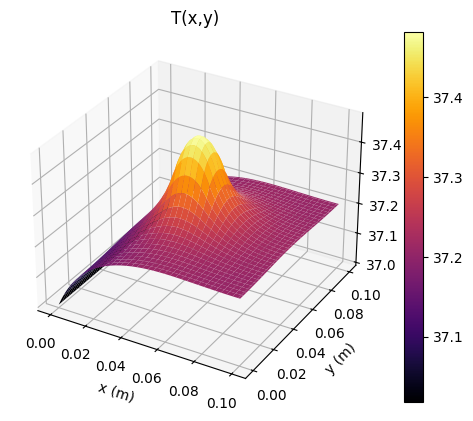

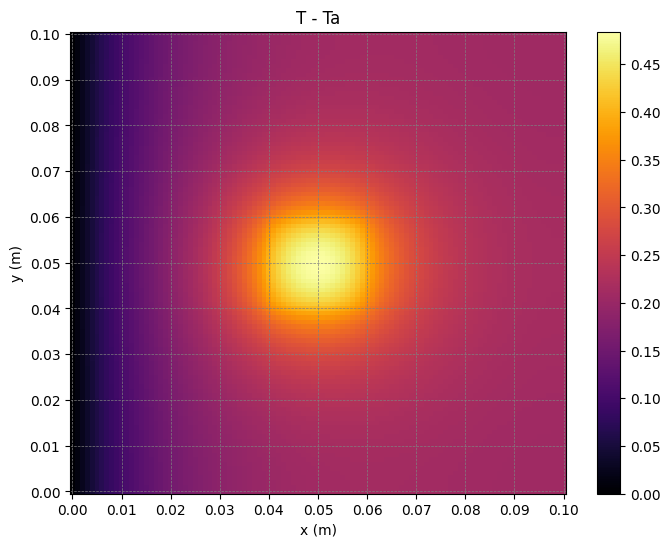

In [ ]:
# Carregar dataset
dataset = np.loadtxt('Sem_Hip.txt')

h = 1e-3

# Criar grade de valores x e y
x = np.arange(0, 0.1 + h, h)
y = np.arange(0, 0.1 + h, h)

# Criar DataFrame para o heatmap
conf_matrix_df = pd.DataFrame(dataset, columns=x, index=y)

# Criar meshgrid para plotagem 3D
X, Y = np.meshgrid(x, y)

Ta = 37

T = dataset

# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, T, cmap='inferno')
plt.colorbar(surface)

plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('T(x,y)')
plt.show()

# Plot 2D
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, T - Ta, cmap='inferno')
cb = plt.colorbar(c)
cb.locator = ticker.MaxNLocator(integer=True)

plt.xticks(np.arange(X.min(), X.max() + 0.01, 0.01))
plt.yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))

plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
cb.update_ticks()

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('T - Ta')

plt.show()

##Parte com hipertermia

- Resolver a Eq. (1) com o termo Qr e sem a derivada em relação ao tempo
- Incluir uma motivação e contextualização do tema
- Incluir conclusões sobre o estudo realizado

In [ ]:
# Importando bibliotecas necessárias

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math
import time
plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
# Definindo o domínio e

h = 5e-3
x_size = 0.1
y_size = 0.1
x = np.arange(0, x_size+h/2, h)
y = np.arange(0, y_size+h/2, h)

# Funcoes uteis

def Q_r(xi, yi, x, y, n):
  r_o = 3.1e-3

  A = 1.3e6 / n
  Qr = 0

  for site in range(n):
    r = np.sqrt((x - xi[site])**2 + (y - yi[site])**2)

    # Contribuição do ponto de injeção
    Qr += A * np.exp(-r**2 / r_o**2)

  return Qr

def harmonica_j(i, x, j, y): # k_{j+(1/2)} - eixo x
  if j+1 >= len(x):  # Tratamento na borda direita
    return k(x[j], y[i])  # Considera apenas o valor local
  return ( 2 * k(x[j], y[i]) * k(x[j+1], y[i]) ) / ( k(x[j], y[i]) + k(x[j+1], y[i]) )

def harmonica_i(i, x, j, y): # k_{i+(1/2)} - eixo y
  if i+1 >= len(y):  # Tratamento na borda superior
    return k(x[j], y[i])  # Considera apenas o valor local
  return ( 2 * k(x[j], y[i]) * k(x[j], y[i+1]) ) / ( k(x[j], y[i]) + k(x[j], y[i+1]) )

def tumor(x, y):
  if 0.04 <= x <= 0.06 and 0.04 <= y <= 0.06:
    return True
  else:
    return False

# Parametros

p_b = 1*10**3
c_b = 4.2*10**3
Ta = 37

tam = len(x) #dimensão do sistema
k_it = 0
k_max = 100000 #numero maximo de iteraçoes do metodo
error = 1
error_max = 1e-8 #erro para convergencia

# Condicoes de Contorno

T_a = Ta #dirichlet esquerdo

def k(x, y):
  if tumor(x, y):
    return 0.55
  else:
    return 0.5

def w_b(x, y):
  if tumor(x, y):
    return 1.25*10**-3
  else:
    return 5*10**-4

def Q_m(x, y):
  if tumor(x, y):
    return 4200
  else:
    return 420

#Valores de T
T = np.ones((tam,tam)) * Ta
T_new = np.zeros((tam,tam))

time_start = time.time()

alpha=1
beta=1
gamma=Ta

while (k_it<k_max and error > error_max):
  for i in range(tam): # eixo y (cresce para cima)
    for j in range(tam): # eixo x (cresce para direita)
      #TODAS AS RELAÇÕES COM PONTOS FICTICIOS
      # uijc = 2*h*u_c+u[i,tam-2] if j==tam-1 else u[i,j+1]
      # uija = 2*h*u_a+u[i,1] if j==0 else u[i,j-1]
      # uijb = 2*h*u_b+u[tam-2,j] if i==tam-1 else u[i+1,j]
      # uijd = 2*h*u_d+u[1,j] if i==0 else u[i-1,j]

      # Para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
      if (i == 0):  # Condição Robin na borda inferior (lado de baixo)
          T_new[i, j] = T[1,j]
      elif (i == tam - 1):  # Condição Robin na borda superior (lado de cima)
          T_new[i, j] = T[tam-2,j]
      elif (j == 0):  # Condição Robin na borda esquerda
          T_new[i, j] = Ta
      elif (j == tam - 1):  # Condição Robin na borda direita
          T_new[i, j] = T[i,tam-2]

      else: # Pontos internos da matriz
        Tija = T[i,j-1]
        Tijb = T[i+1,j]
        Tijc = T[i,j+1]
        Tijd = T[i-1,j]

        qija = harmonica_i(i, x, j, y) # esquerda
        qijb = harmonica_j(i, x, j+1, y) # cima
        qijc = harmonica_i(i+1, x, j, y) # direita
        qijd = harmonica_j(i, x, j, y) # baixo
        qij = qija + qijb + qijc + qijd
        T_new[i,j] = ((qija*Tija + qijb*Tijb + qijc*Tijc + qijd*Tijd) + h**2*w_b(x[j], y[i])*p_b*c_b*Ta + h**2*(Q_m(x[j], y[i]) + Q_r([0.05], [0.05], x[j], y[i], 1))) / (qij + h**2*w_b(x[j], y[i])*p_b*c_b) #1 local de injeção
        # T_new[i,j] = ((qija*Tija + qijb*Tijb + qijc*Tijc + qijd*Tijd) + h**2*w_b(x[j], y[i])*p_b*c_b*Ta + h**2*(Q_m(x[j], y[i]) + Q_r([0.045, 0.045, 0.055, 0.055], [0.055, 0.045, 0.045, 0.055], x[j], y[i], 4))) / (qij + h**2*w_b(x[j], y[i])*p_b*c_b) #4 locais de injeção

  error = np.linalg.norm(T_new-T, np.inf)/np.linalg.norm(T_new, np.inf)
  k_it=k_it+1
  T = np.copy(T_new)
time_end = time.time()

tumor_total = 0
tumor_com_necro = 0
tecido_total = 0
tecido_com_necro = 0

# Verificação de necrose
for i in range(tam):
    for j in range(tam):
        if tumor(x[j], y[i]):  # Ponto dentro do tumor
            tumor_total += 1
            if T[i, j] > 43:
                tumor_com_necro += 1
        else:  # Ponto no tecido saudável
            tecido_total += 1
            if T[i, j] > 43:
                tecido_com_necro += 1

# Calculando porcentagens
tumor_necro = tumor_com_necro / tumor_total
tecido_necro = tecido_com_necro / tecido_total

print(f"Porcentagem de necrose no tumor: {tumor_necro * 100:.2f}%")
print(f"Porcentagem de necrose no tecido saudável: {tecido_necro * 100:.2f}%")

print(f"{k_it} iterações, erro: {error}")
if (time_end - time_start) > 60:
  print(f"Tempo: {(time_end - time_start) / 60.0} min")
else:
  print(f"Tempo: {time_end - time_start} s")

Porcentagem de necrose no tumor: 52.00%
Porcentagem de necrose no tecido saudável: 0.00%
416 iterações, erro: 9.729385587222703e-09
Tempo: 3.0525829792022705 s


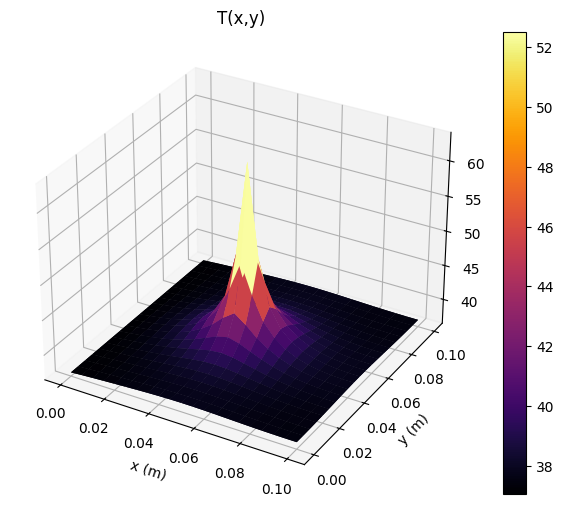

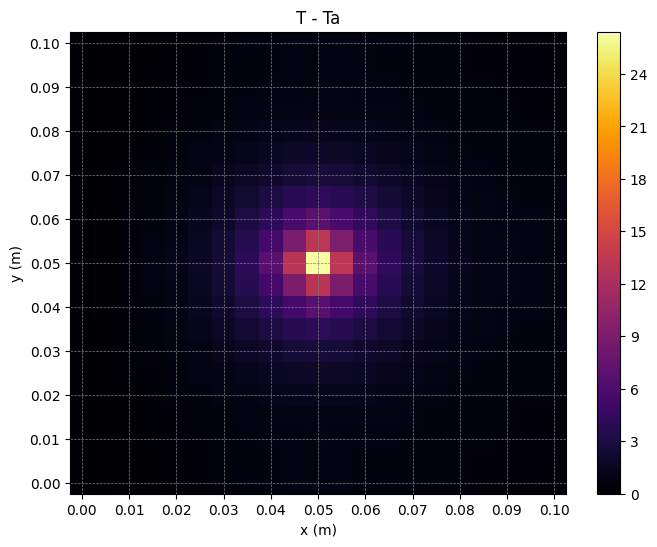

In [ ]:
import matplotlib.ticker as ticker

X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_wireframe(x, y, u)
ax.plot_surface(X, Y, T, cmap='inferno')
plt.colorbar(ax.plot_surface(X, Y, T, cmap='inferno'))
# inverter angulo de plot
# ax.view_init(30, 120)

plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('T(x,y)')

plt.show()

plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, T - Ta, cmap='inferno')  # Plot em 2D
cb = plt.colorbar(c)
cb.locator = ticker.MaxNLocator(integer=True)

plt.xticks(np.arange(X.min(), X.max() + 0.01, 0.01))  # Ticks no eixo x de 0.01 em 0.01
plt.yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))  # Ticks no eixo y de 0.01 em 0.01

plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
cb.update_ticks()

# Labels e título
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('T - Ta')

# Exibindo o gráfico
plt.show()

###Implementação em C++

In [ ]:
%%writefile main.cpp

#include <iostream>
#include <vector>
#include <cmath>
#include <ctime>
#include <algorithm>
#include <fstream>

using namespace std;

const double h = 1e-3;
const double x_size = 0.1;
const double y_size = 0.1;

vector<double> create_range(double start, double end, double step) {
    vector<double> range;
    for (double val = start; val <= end; val += step) {
        range.push_back(val);
    }
    return range;
}

bool tumor(double x, double y) {
    return (0.04 <= x && x <= 0.06 && 0.04 <= y && y <= 0.06);
}

double k(double x, double y) {
    return tumor(x, y) ? 0.55 : 0.5;
}

double w_b(double x, double y) {
    return tumor(x, y) ? 1.25e-3 : 5e-4;
}

double Q_m(double x, double y) {
    return tumor(x, y) ? 4200 : 420;
}

double Q_r(const vector<double>& xi, const vector<double>& yi, double x, double y, int n) {
    const double r_o = 3.1e-3;
    const double A = 1.3e6 / n;
    double Qr = 0;

    for (int site = 0; site < n; ++site) {
        double r = sqrt(pow(x - xi[site], 2) + pow(y - yi[site], 2));
        Qr += A * exp(-pow(r / r_o, 2));
    }
    return Qr;
}

double harmonica_j(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (j + 1 >= x.size())
      return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j + 1], y[i])) / (k(x[j], y[i]) + k(x[j + 1], y[i]));
}

double harmonica_i(int i, const vector<double>& x, int j, const vector<double>& y) {
    if (i + 1 >= y.size())
      return k(x[j], y[i]);
    return (2 * k(x[j], y[i]) * k(x[j], y[i + 1])) / (k(x[j], y[i]) + k(x[j], y[i + 1]));
}

int main() {
    vector<double> x = create_range(0, x_size + h / 2, h);
    vector<double> y = create_range(0, y_size + h / 2, h);

    const double p_b = 1e3;
    const double c_b = 4.2e3;
    const double Ta = 37;

    int tam = x.size();
    vector<vector<double>> T(tam, vector<double>(tam, Ta));
    vector<vector<double>> T_new(tam, vector<double>(tam, 0));

    const int k_max = 100000;
    const double error_max = 1e-8;

    double error = 1;
    int k_it = 0;

    clock_t start_time = clock();

    while (k_it < k_max && error > error_max) {
        for (int i = 0; i < tam; ++i) {
            for (int j = 0; j < tam; ++j) {
                if (i == 0) {
                    T_new[i][j] = T[1][j];
                } else if (i == tam - 1) {
                    T_new[i][j] = T[tam - 2][j];
                } else if (j == 0) {
                    T_new[i][j] = Ta;
                } else if (j == tam - 1) {
                    T_new[i][j] = T[i][tam - 2];
                } else {
                    double Tija = T[i][j - 1];
                    double Tijb = T[i + 1][j];
                    double Tijc = T[i][j + 1];
                    double Tijd = T[i - 1][j];

                    double qija = harmonica_i(i, x, j, y);
                    double qijb = harmonica_j(i, x, j + 1, y);
                    double qijc = harmonica_i(i + 1, x, j, y);
                    double qijd = harmonica_j(i, x, j, y);
                    double qij = qija + qijb + qijc + qijd;

                    T_new[i][j] = ((qija * Tija + qijb * Tijb + qijc * Tijc + qijd * Tijd) +
                                  h * h * w_b(x[j], y[i]) * p_b * c_b * Ta +
                                  h * h * (Q_m(x[j], y[i]) + Q_r({0.05}, {0.05}, x[j], y[i], 1))) /
                                 (qij + h * h * w_b(x[j], y[i]) * p_b * c_b); //1 local de injeção

                    // T_new[i][j] = ((qija * Tija + qijb * Tijb + qijc * Tijc + qijd * Tijd) +
                    //               h * h * w_b(x[j], y[i]) * p_b * c_b * Ta +
                    //               h * h * (Q_m(x[j], y[i]) + Q_r({0.045, 0.045, 0.055, 0.055}, {0.055, 0.045, 0.045, 0.055}, x[j], y[i], 4))) /
                    //              (qij + h * h * w_b(x[j], y[i]) * p_b * c_b); //4 locais de injeção
                }
            }
        }

        double max_error = 0;
        for (int i = 0; i < tam; ++i) {
            for (int j = 0; j < tam; ++j) {
                max_error = max(max_error, abs(T_new[i][j] - T[i][j]));
            }
        }

        error = max_error;
        T = T_new;
        ++k_it;
    }

    double tumor_total = 0;
    double tumor_com_necro = 0;
    double tecido_total = 0;
    double tecido_com_necro = 0;

    //Verificação de necrose
    for(int i = 0; i < tam; ++i){
        for(int j = 0; j< tam; ++j){
            if (tumor(x[j], y[i])){  //Ponto dentro do tumor
                tumor_total += 1;
                if (T[i][j] > 43){
                    tumor_com_necro += 1;
                }
            }
            else{  //Ponto no tecido saudável
                tecido_total += 1;
                if (T[i][j] > 43){
                    tecido_com_necro += 1;
                }
            }
        }
    }

    //Calculando porcentagens
    double tumor_necro = tumor_com_necro / tumor_total;
    double tecido_necro = tecido_com_necro / tecido_total;

    cout << "Porcentagem de necrose no tumor: " << tumor_necro * 100 << "%" << endl;
    cout << "Porcentagem de necrose no tecido saudável: " << tecido_necro * 100 << "%" << endl;

    clock_t end_time = clock();
    double elapsed_time = double(end_time - start_time) / CLOCKS_PER_SEC;

    cout << k_it << " iteracoes, erro: " << error << endl;
    cout << "Tempo: " << elapsed_time << " segundos" << endl;

    // Salvar matriz no arquivo
    ofstream outFile("Hip.txt");
    if (!outFile) {
        cerr << "Erro ao abrir o arquivo para escrita." << endl;
        return 1;
    }

    for (const auto& row : T) {
        for (const auto& value : row) {
            outFile << value << " ";
        }
        outFile << endl;
    }

    outFile.close();

    return 0;
}


Writing main.cpp


In [ ]:
!g++ main.cpp -o main
!./main

Porcentagem de necrose no tumor: 0%
Porcentagem de necrose no tecido saudável: 0%
9752 iteracoes, erro: 9.99678e-09
Tempo: 98.0022 segundos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from google.colab import files
import numpy as np

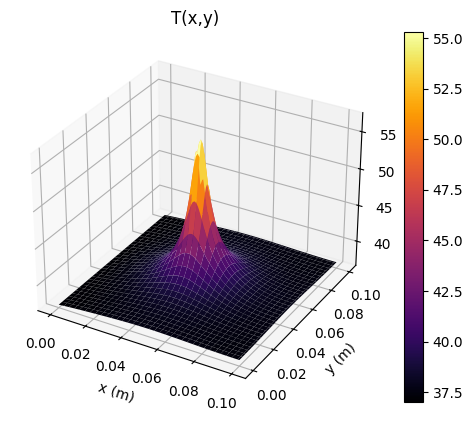

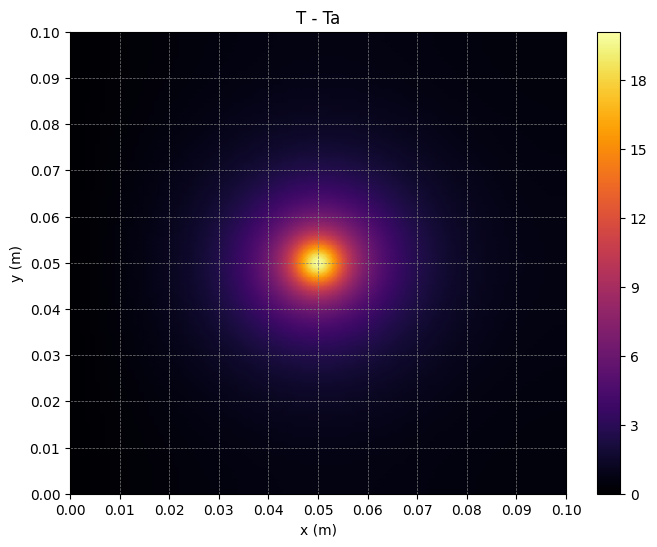

In [ ]:
# Carregar dataset
dataset = np.loadtxt('Hip.txt')

h = 1e-3

# Criar grade de valores x e y
x = np.arange(0, 0.1 + h, h)
y = np.arange(0, 0.1 + h, h)

# Criar DataFrame para o heatmap
conf_matrix_df = pd.DataFrame(dataset, columns=x, index=y)

# Criar meshgrid para plotagem 3D
X, Y = np.meshgrid(x, y)

Ta = 37

T = dataset

# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(X, Y, T, cmap='inferno')
plt.colorbar(surface)

plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('T(x,y)')
plt.show()

# Plot 2D
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, T - Ta, cmap='inferno', shading='gouraud')
cb = plt.colorbar(c)
cb.locator = ticker.MaxNLocator(integer=True)

plt.xticks(np.arange(X.min(), X.max() + 0.01, 0.01))
plt.yticks(np.arange(Y.min(), Y.max() + 0.01, 0.01))

plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
cb.update_ticks()

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('T - Ta')

plt.show()